# Notebook Imports

In [1]:
# Import Pandas as Dependencies
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# from sqlalchemy import create_engine
# from config import protocol, username, password, host, port, database_name


from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel

from sklearn.linear_model import LogisticRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report
from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score

# Connect to AWS Server

In [2]:
# # Connect to postgres database
# rds_connection_string = f'{protocol}://{username}:{password}@{host}:{port}/{database_name}'
# engine = create_engine(rds_connection_string)

# Supervised Machine Learning with First Dataframe (71,782 rows)
* Since our dataset is a labeled (LAhalfand10) dataset and has two class labels (0 and 1), we are using binary classification supervised machine learning models

## Load Data

In [3]:
# # First dataframe
# df1 = pd.read_sql_query('select * from food_access_1', engine)
# df1.tail()

In [4]:
# Read df1
df1 = pd.read_csv("first_food_access.csv", index_col=0)
df1.head()

,StateFIPS,CensusTract,State,County,Urban,Pop2010,OHU2010,PovertyRate,MedianFamilyIncome,LAhalfand10,...,TractSeniors_PCT,TractWhite_PCT,TractBlack_PCT,TractAsian_PCT,TractNHOPI_PCT,TractAIAN_PCT,TractOMultir_PCT,TractHispanic_PCT,TractHUNV_PCT,TractSNAP_PCT
0,1,1001020100,Alabama,Autauga County,1,1912,693,11.3,81250.0,1,...,11.56,84.83,11.35,0.73,0.00,0.73,2.35,2.30,0.87,14.72
1,1,1001020200,Alabama,Autauga County,1,2170,743,17.9,49000.0,1,...,9.86,40.92,56.08,0.23,0.00,0.23,2.53,3.46,11.98,21.00
2,1,1001020300,Alabama,Autauga County,1,3373,1256,15.0,62609.0,1,...,13.02,76.37,19.18,0.50,0.15,0.33,3.47,2.58,7.88,13.69
3,1,1001020400,Alabama,Autauga County,1,4386,1722,2.8,70607.0,1,...,20.61,93.16,4.40,0.41,0.09,0.25,1.69,1.94,1.22,5.69
4,1,1001020500,Alabama,Autauga County,1,10766,4082,15.2,96334.0,1,...,10.46,80.49,13.35,2.75,0.08,0.45,2.88,3.30,5.63,8.30


## Preprocessing Data

In [5]:
# Calculate population / # of households in order to create a new column
df1['Pop_per_household'] = df1['Pop2010']/df1['OHU2010']
df1.head()

,StateFIPS,CensusTract,State,County,Urban,Pop2010,OHU2010,PovertyRate,MedianFamilyIncome,LAhalfand10,...,TractWhite_PCT,TractBlack_PCT,TractAsian_PCT,TractNHOPI_PCT,TractAIAN_PCT,TractOMultir_PCT,TractHispanic_PCT,TractHUNV_PCT,TractSNAP_PCT,Pop_per_household
0,1,1001020100,Alabama,Autauga County,1,1912,693,11.3,81250.0,1,...,84.83,11.35,0.73,0.00,0.73,2.35,2.30,0.87,14.72,2.759019
1,1,1001020200,Alabama,Autauga County,1,2170,743,17.9,49000.0,1,...,40.92,56.08,0.23,0.00,0.23,2.53,3.46,11.98,21.00,2.920592
2,1,1001020300,Alabama,Autauga County,1,3373,1256,15.0,62609.0,1,...,76.37,19.18,0.50,0.15,0.33,3.47,2.58,7.88,13.69,2.685510
3,1,1001020400,Alabama,Autauga County,1,4386,1722,2.8,70607.0,1,...,93.16,4.40,0.41,0.09,0.25,1.69,1.94,1.22,5.69,2.547038
4,1,1001020500,Alabama,Autauga County,1,10766,4082,15.2,96334.0,1,...,80.49,13.35,2.75,0.08,0.45,2.88,3.30,5.63,8.30,2.637433


In [6]:
# List of columns to refer to during pre-processing and training
list(df1.columns)

['StateFIPS',
 'CensusTract',
 'State',
 'County',
 'Urban',
 'Pop2010',
 'OHU2010',
 'PovertyRate',
 'MedianFamilyIncome',
 'LAhalfand10',
 'TractLOWI',
 'TractKids',
 'TractSeniors',
 'TractWhite',
 'TractBlack',
 'TractAsian',
 'TractNHOPI',
 'TractAIAN',
 'TractOMultir',
 'TractHispanic',
 'TractHUNV',
 'TractSNAP',
 'TractLOWI_PCT',
 'TractKids_PCT',
 'TractSeniors_PCT',
 'TractWhite_PCT',
 'TractBlack_PCT',
 'TractAsian_PCT',
 'TractNHOPI_PCT',
 'TractAIAN_PCT',
 'TractOMultir_PCT',
 'TractHispanic_PCT',
 'TractHUNV_PCT',
 'TractSNAP_PCT',
 'Pop_per_household']

In [7]:
# Drop columns that don't contribute to the model
df1= df1.drop(columns = ['Pop2010', 'OHU2010', 'StateFIPS', 'CensusTract', 'State', 'County', 'Urban',
              'TractLOWI', 'TractKids', 'TractSeniors', 'TractWhite', 'TractBlack', 'TractAsian', 
              'TractNHOPI', 'TractAIAN', 'TractOMultir', 'TractHispanic', 'TractHUNV', 'TractSNAP'])
df1.head()

,PovertyRate,MedianFamilyIncome,LAhalfand10,TractLOWI_PCT,TractKids_PCT,TractSeniors_PCT,TractWhite_PCT,TractBlack_PCT,TractAsian_PCT,TractNHOPI_PCT,TractAIAN_PCT,TractOMultir_PCT,TractHispanic_PCT,TractHUNV_PCT,TractSNAP_PCT,Pop_per_household
0,11.3,81250.0,1,23.80,26.52,11.56,84.83,11.35,0.73,0.00,0.73,2.35,2.30,0.87,14.72,2.759019
1,17.9,49000.0,1,36.96,27.93,9.86,40.92,56.08,0.23,0.00,0.23,2.53,3.46,11.98,21.00,2.920592
2,15.0,62609.0,1,38.72,26.50,13.02,76.37,19.18,0.50,0.15,0.33,3.47,2.58,7.88,13.69,2.685510
3,2.8,70607.0,1,21.02,23.14,20.61,93.16,4.40,0.41,0.09,0.25,1.69,1.94,1.22,5.69,2.547038
4,15.2,96334.0,1,20.82,29.37,10.46,80.49,13.35,2.75,0.08,0.45,2.88,3.30,5.63,8.30,2.637433


In [8]:
# Move the target column to the last
cols = list(df1.columns.values)
cols.pop(cols.index('LAhalfand10')) 
df1 = df1[cols+['LAhalfand10']]
df1.head()

,PovertyRate,MedianFamilyIncome,TractLOWI_PCT,TractKids_PCT,TractSeniors_PCT,TractWhite_PCT,TractBlack_PCT,TractAsian_PCT,TractNHOPI_PCT,TractAIAN_PCT,TractOMultir_PCT,TractHispanic_PCT,TractHUNV_PCT,TractSNAP_PCT,Pop_per_household,LAhalfand10
0,11.3,81250.0,23.80,26.52,11.56,84.83,11.35,0.73,0.00,0.73,2.35,2.30,0.87,14.72,2.759019,1
1,17.9,49000.0,36.96,27.93,9.86,40.92,56.08,0.23,0.00,0.23,2.53,3.46,11.98,21.00,2.920592,1
2,15.0,62609.0,38.72,26.50,13.02,76.37,19.18,0.50,0.15,0.33,3.47,2.58,7.88,13.69,2.685510,1
3,2.8,70607.0,21.02,23.14,20.61,93.16,4.40,0.41,0.09,0.25,1.69,1.94,1.22,5.69,2.547038,1
4,15.2,96334.0,20.82,29.37,10.46,80.49,13.35,2.75,0.08,0.45,2.88,3.30,5.63,8.30,2.637433,1


In [9]:
# Check for null values
df1.isnull().sum()

PovertyRate           0
MedianFamilyIncome    0
TractLOWI_PCT         0
TractKids_PCT         0
TractSeniors_PCT      0
TractWhite_PCT        0
TractBlack_PCT        0
TractAsian_PCT        0
TractNHOPI_PCT        0
TractAIAN_PCT         0
TractOMultir_PCT      0
TractHispanic_PCT     0
TractHUNV_PCT         0
TractSNAP_PCT         0
Pop_per_household     0
LAhalfand10           0
dtype: int64

In [10]:
# Check for duplicate values 
df1.duplicated().sum()

0

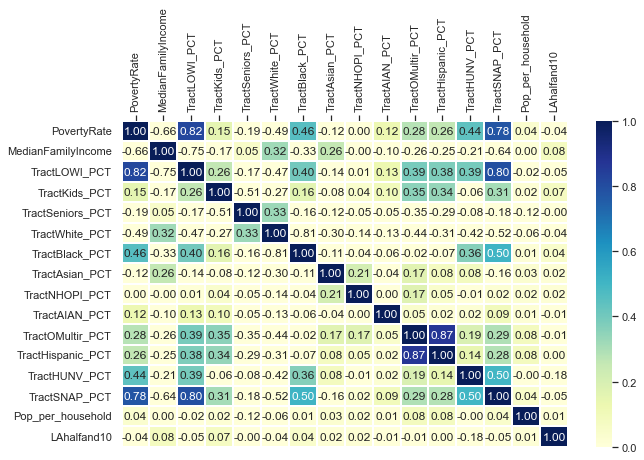

In [11]:
# Check coorelation coefficient of feature in df 
corrM = df1.corr()
  
# Create a heatmap for all parameter correlation values
sns.set(style="white",font_scale=1)
plt.figure(figsize = (10,6))
ax=sns.heatmap(corrM, cmap="YlGnBu", fmt='.2f',annot=True,\
             xticklabels=True,linewidth=2, vmin=0, vmax=1)
# Set x-axis on top and rotate for clarity
ax.xaxis.tick_top()
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [12]:
# Define features and target
X = df1.drop('LAhalfand10', axis=1)
y = df1['LAhalfand10']

# Scale data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Testing Various Binary Classification Models: Model, Fit, Predict

In [13]:
# Create models
models = [
    LogisticRegression(),
    Lasso(),
    Ridge(),
    ElasticNet(),
    KNeighborsClassifier(),
    GaussianNB(),
    SVC(),
    DecisionTreeClassifier(),
    AdaBoostClassifier(),
    RandomForestClassifier()
    
]


In [14]:
# Fit and Pedict models
for model in models:
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)       
    print(model)
    print(f'Training Score: {model.score(X_train_scaled, y_train)}')
    print(f'Testing Score: {model.score(X_test_scaled, y_test)}')
    print()   
      

LogisticRegression()
Training Score: 0.704862917007207
Testing Score: 0.706452691407556

Lasso()
Training Score: 0.0
Testing Score: -3.8758508688729876e-05

Ridge()
Training Score: 0.062360117996025144
Testing Score: 0.06697101151080731

ElasticNet()
Training Score: 0.0
Testing Score: -3.8758508688729876e-05

KNeighborsClassifier()
Training Score: 0.8129690170146371
Testing Score: 0.7360414577064527

GaussianNB()
Training Score: 0.6465190578794858
Testing Score: 0.6479995542182102

SVC()
Training Score: 0.7652314436436585
Testing Score: 0.7616181878970244

DecisionTreeClassifier()
Training Score: 1.0
Testing Score: 0.6846651064304023

AdaBoostClassifier()
Training Score: 0.7478267330410877
Testing Score: 0.7485233478212415

RandomForestClassifier()
Training Score: 1.0
Testing Score: 0.7774991641591441



# Model Optimization

## Feature Selection

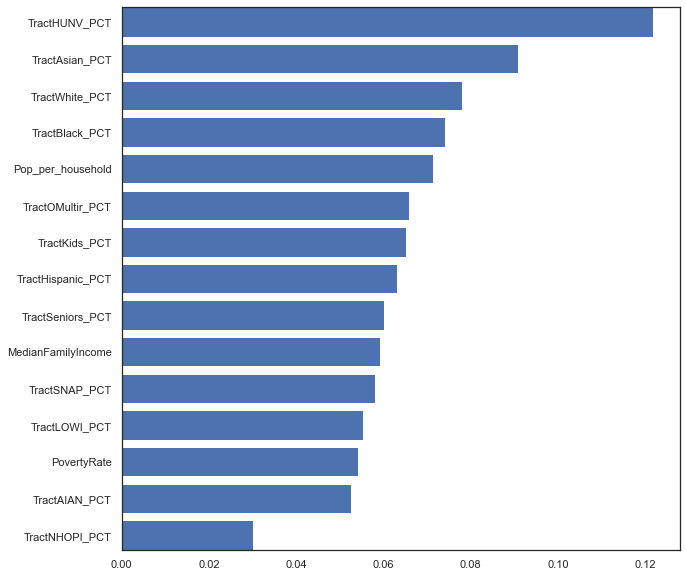

In [15]:
# Create Random Forest Classifier model
clf = RandomForestClassifier().fit(X_train_scaled, y_train)

# visualize the feature importance
feature_importances = clf.feature_importances_
# print(features)

features = sorted(zip(X.columns, clf.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
plt.margins(y=0.001)
ax.barh(y=cols, width=width)

plt.show()

In [16]:
# Select important feature for model
sel = SelectFromModel(clf)
sel.fit(X_train_scaled, y_train)

# Split train/ test data
X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X), y, random_state=1)

# Scale the selected features
scaler = StandardScaler().fit(X_selected_train)
X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)

# Create and fit model with selected features
clf = RandomForestClassifier(random_state=1, n_estimators=100).fit(X_selected_train_scaled, y_train)

# Predict model
y_pred = clf.predict(X_selected_test_scaled)

# Display score
print(classification_report(y_test, y_pred))
print(f'Training Score: {clf.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_selected_test_scaled, y_test)}')

C:\Users\meena\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.64      0.47      0.55      5681
           1       0.78      0.88      0.83     12265

    accuracy                           0.75     17946
   macro avg       0.71      0.68      0.69     17946
weighted avg       0.74      0.75      0.74     17946

Training Score: 0.9999814250687272
Testing Score: 0.7505850885991308


## Hyperparameter Tuning with GridSearchCV

In [17]:
# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search
param_grid = {
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200]
}

# Create a base model
clf = RandomForestClassifier()

# Instantiate the grid search model
grid_clf = GridSearchCV(estimator = clf, param_grid = param_grid,
                          cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_clf.fit(X_selected_train_scaled, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [18]:
# List the best parameters for this dataset
print(grid_clf.best_params_)

# Predict model
y_pred = grid_clf.predict(X_selected_test_scaled)

# Display score
print(classification_report(y_test, y_pred))

print(f'Training Score: {grid_clf.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {grid_clf.score(X_selected_test_scaled, y_test)}')

{'max_depth': 7, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.70      0.40      0.51      5681
           1       0.77      0.92      0.84     12265

    accuracy                           0.76     17946
   macro avg       0.74      0.66      0.67     17946
weighted avg       0.75      0.76      0.73     17946

Training Score: 0.7633739505163831
Testing Score: 0.7572160927226123


# Random Forest Classifier with Second Dataframe (7,708 rows)
* This dataframe was created by adding 26 more features to first dataframe (as part of model optimization) but resulted into a much smaller dataframe due to excessive null values.

## Load Data

In [19]:
# # Second dataframe
# df2 = pd.read_sql_query('select * from food_access_2', engine)
# df2.tail()

In [20]:
# Read df2
df2 = pd.read_csv("second_food_access.csv", index_col=0)
df2.head()

,StateFIPS,CensusTract,State,County,Urban,Pop2010,OHU2010,PovertyRate,MedianFamilyIncome,LAhalfand10,...,TractSeniors_PCT,TractWhite_PCT,TractBlack_PCT,TractAsian_PCT,TractNHOPI_PCT,TractAIAN_PCT,TractOMultir_PCT,TractHispanic_PCT,TractHUNV_PCT,TractSNAP_PCT
0,1,1001020801,Alabama,Autauga County,0,3081,1074,8.9,89423.0,0,...,11.07,87.31,9.02,0.52,0.00,0.88,2.27,1.85,6.33,13.31
1,1,1001020802,Alabama,Autauga County,0,10435,3694,13.7,84833.0,0,...,10.16,83.79,13.29,0.58,0.07,0.47,1.79,1.52,5.36,9.53
2,1,1001020900,Alabama,Autauga County,0,5675,2067,9.8,77865.0,0,...,11.10,85.20,11.96,0.35,0.05,0.25,2.19,1.69,4.69,16.45
3,1,1001021000,Alabama,Autauga County,0,2894,1085,22.7,60900.0,1,...,11.99,76.81,20.84,0.10,0.00,0.62,1.62,1.35,0.83,13.46
4,1,1001021100,Alabama,Autauga County,0,3320,1306,24.1,49833.0,1,...,14.85,43.40,54.52,0.06,0.00,0.42,1.60,1.17,20.60,17.61


# Preprocess Data

In [21]:
# Calculate population / # of households in order to create a new column
df2['Pop_per_household'] = df2['Pop2010']/df2['OHU2010']
df2.head()

,StateFIPS,CensusTract,State,County,Urban,Pop2010,OHU2010,PovertyRate,MedianFamilyIncome,LAhalfand10,...,TractWhite_PCT,TractBlack_PCT,TractAsian_PCT,TractNHOPI_PCT,TractAIAN_PCT,TractOMultir_PCT,TractHispanic_PCT,TractHUNV_PCT,TractSNAP_PCT,Pop_per_household
0,1,1001020801,Alabama,Autauga County,0,3081,1074,8.9,89423.0,0,...,87.31,9.02,0.52,0.00,0.88,2.27,1.85,6.33,13.31,2.868715
1,1,1001020802,Alabama,Autauga County,0,10435,3694,13.7,84833.0,0,...,83.79,13.29,0.58,0.07,0.47,1.79,1.52,5.36,9.53,2.824851
2,1,1001020900,Alabama,Autauga County,0,5675,2067,9.8,77865.0,0,...,85.20,11.96,0.35,0.05,0.25,2.19,1.69,4.69,16.45,2.745525
3,1,1001021000,Alabama,Autauga County,0,2894,1085,22.7,60900.0,1,...,76.81,20.84,0.10,0.00,0.62,1.62,1.35,0.83,13.46,2.667281
4,1,1001021100,Alabama,Autauga County,0,3320,1306,24.1,49833.0,1,...,43.40,54.52,0.06,0.00,0.42,1.60,1.17,20.60,17.61,2.542113


In [22]:
# List of columns to refer to during pre-processing and training
list(df2.columns)

['StateFIPS',
 'CensusTract',
 'State',
 'County',
 'Urban',
 'Pop2010',
 'OHU2010',
 'PovertyRate',
 'MedianFamilyIncome',
 'LAhalfand10',
 'lapophalfshare',
 'lalowihalfshare',
 'lakidshalfshare',
 'laseniorshalfshare',
 'lawhitehalfshare',
 'lablackhalfshare',
 'laasianhalfshare',
 'lanhopihalfshare',
 'laaianhalfshare',
 'laomultirhalfshare',
 'lahisphalfshare',
 'lahunvhalfshare',
 'lasnaphalfshare',
 'lapop10share',
 'lalowi10share',
 'lakids10share',
 'laseniors10share',
 'lawhite10share',
 'lablack10share',
 'laasian10share',
 'lanhopi10share',
 'laaian10share',
 'laomultir10share',
 'lahisp10share',
 'lahunv10share',
 'lasnap10share',
 'TractLOWI',
 'TractKids',
 'TractSeniors',
 'TractWhite',
 'TractBlack',
 'TractAsian',
 'TractNHOPI',
 'TractAIAN',
 'TractOMultir',
 'TractHispanic',
 'TractHUNV',
 'TractSNAP',
 'TractLOWI_PCT',
 'TractKids_PCT',
 'TractSeniors_PCT',
 'TractWhite_PCT',
 'TractBlack_PCT',
 'TractAsian_PCT',
 'TractNHOPI_PCT',
 'TractAIAN_PCT',
 'TractOMultir_

In [23]:
# Drop columns that don't contribute to the model
df2= df2.drop(columns = ['Pop2010', 'OHU2010', 'StateFIPS', 'CensusTract', 'State', 'County', 'Urban',
              'TractLOWI', 'TractKids', 'TractSeniors', 'TractWhite', 'TractBlack', 'TractAsian', 
              'TractNHOPI', 'TractAIAN', 'TractOMultir', 'TractHispanic', 'TractHUNV', 'TractSNAP'])
df2.head()

,PovertyRate,MedianFamilyIncome,LAhalfand10,lapophalfshare,lalowihalfshare,lakidshalfshare,laseniorshalfshare,lawhitehalfshare,lablackhalfshare,laasianhalfshare,...,TractWhite_PCT,TractBlack_PCT,TractAsian_PCT,TractNHOPI_PCT,TractAIAN_PCT,TractOMultir_PCT,TractHispanic_PCT,TractHUNV_PCT,TractSNAP_PCT,Pop_per_household
0,8.9,89423.0,0,100.00,18.70,26.45,11.07,87.31,9.02,0.52,...,87.31,9.02,0.52,0.00,0.88,2.27,1.85,6.33,13.31,2.868715
1,13.7,84833.0,0,99.00,26.67,27.63,10.06,82.85,13.25,0.58,...,83.79,13.29,0.58,0.07,0.47,1.79,1.52,5.36,9.53,2.824851
2,9.8,77865.0,0,97.79,23.42,26.04,10.86,83.16,11.95,0.34,...,85.20,11.96,0.35,0.05,0.25,2.19,1.69,4.69,16.45,2.745525
3,22.7,60900.0,1,100.00,38.67,25.92,11.99,76.81,20.84,0.10,...,76.81,20.84,0.10,0.00,0.62,1.62,1.35,0.83,13.46,2.667281
4,24.1,49833.0,1,100.00,51.75,22.59,14.85,43.40,54.52,0.06,...,43.40,54.52,0.06,0.00,0.42,1.60,1.17,20.60,17.61,2.542113


In [24]:
# Move the target column to the last
cols = list(df2.columns.values)
cols.pop(cols.index('LAhalfand10')) 
df2 = df2[cols+['LAhalfand10']]
df2.head()

,PovertyRate,MedianFamilyIncome,lapophalfshare,lalowihalfshare,lakidshalfshare,laseniorshalfshare,lawhitehalfshare,lablackhalfshare,laasianhalfshare,lanhopihalfshare,...,TractBlack_PCT,TractAsian_PCT,TractNHOPI_PCT,TractAIAN_PCT,TractOMultir_PCT,TractHispanic_PCT,TractHUNV_PCT,TractSNAP_PCT,Pop_per_household,LAhalfand10
0,8.9,89423.0,100.00,18.70,26.45,11.07,87.31,9.02,0.52,0.00,...,9.02,0.52,0.00,0.88,2.27,1.85,6.33,13.31,2.868715,0
1,13.7,84833.0,99.00,26.67,27.63,10.06,82.85,13.25,0.58,0.07,...,13.29,0.58,0.07,0.47,1.79,1.52,5.36,9.53,2.824851,0
2,9.8,77865.0,97.79,23.42,26.04,10.86,83.16,11.95,0.34,0.05,...,11.96,0.35,0.05,0.25,2.19,1.69,4.69,16.45,2.745525,0
3,22.7,60900.0,100.00,38.67,25.92,11.99,76.81,20.84,0.10,0.00,...,20.84,0.10,0.00,0.62,1.62,1.35,0.83,13.46,2.667281,1
4,24.1,49833.0,100.00,51.75,22.59,14.85,43.40,54.52,0.06,0.00,...,54.52,0.06,0.00,0.42,1.60,1.17,20.60,17.61,2.542113,1


In [25]:
# Check for null values
df2.isnull().sum()

PovertyRate           0
MedianFamilyIncome    0
lapophalfshare        0
lalowihalfshare       0
lakidshalfshare       0
laseniorshalfshare    0
lawhitehalfshare      0
lablackhalfshare      0
laasianhalfshare      0
lanhopihalfshare      0
laaianhalfshare       0
laomultirhalfshare    0
lahisphalfshare       0
lahunvhalfshare       0
lasnaphalfshare       0
lapop10share          0
lalowi10share         0
lakids10share         0
laseniors10share      0
lawhite10share        0
lablack10share        0
laasian10share        0
lanhopi10share        0
laaian10share         0
laomultir10share      0
lahisp10share         0
lahunv10share         0
lasnap10share         0
TractLOWI_PCT         0
TractKids_PCT         0
TractSeniors_PCT      0
TractWhite_PCT        0
TractBlack_PCT        0
TractAsian_PCT        0
TractNHOPI_PCT        0
TractAIAN_PCT         0
TractOMultir_PCT      0
TractHispanic_PCT     0
TractHUNV_PCT         0
TractSNAP_PCT         0
Pop_per_household     0
LAhalfand10     

In [26]:
# Check for duplicate values 
df2.duplicated().sum()

0

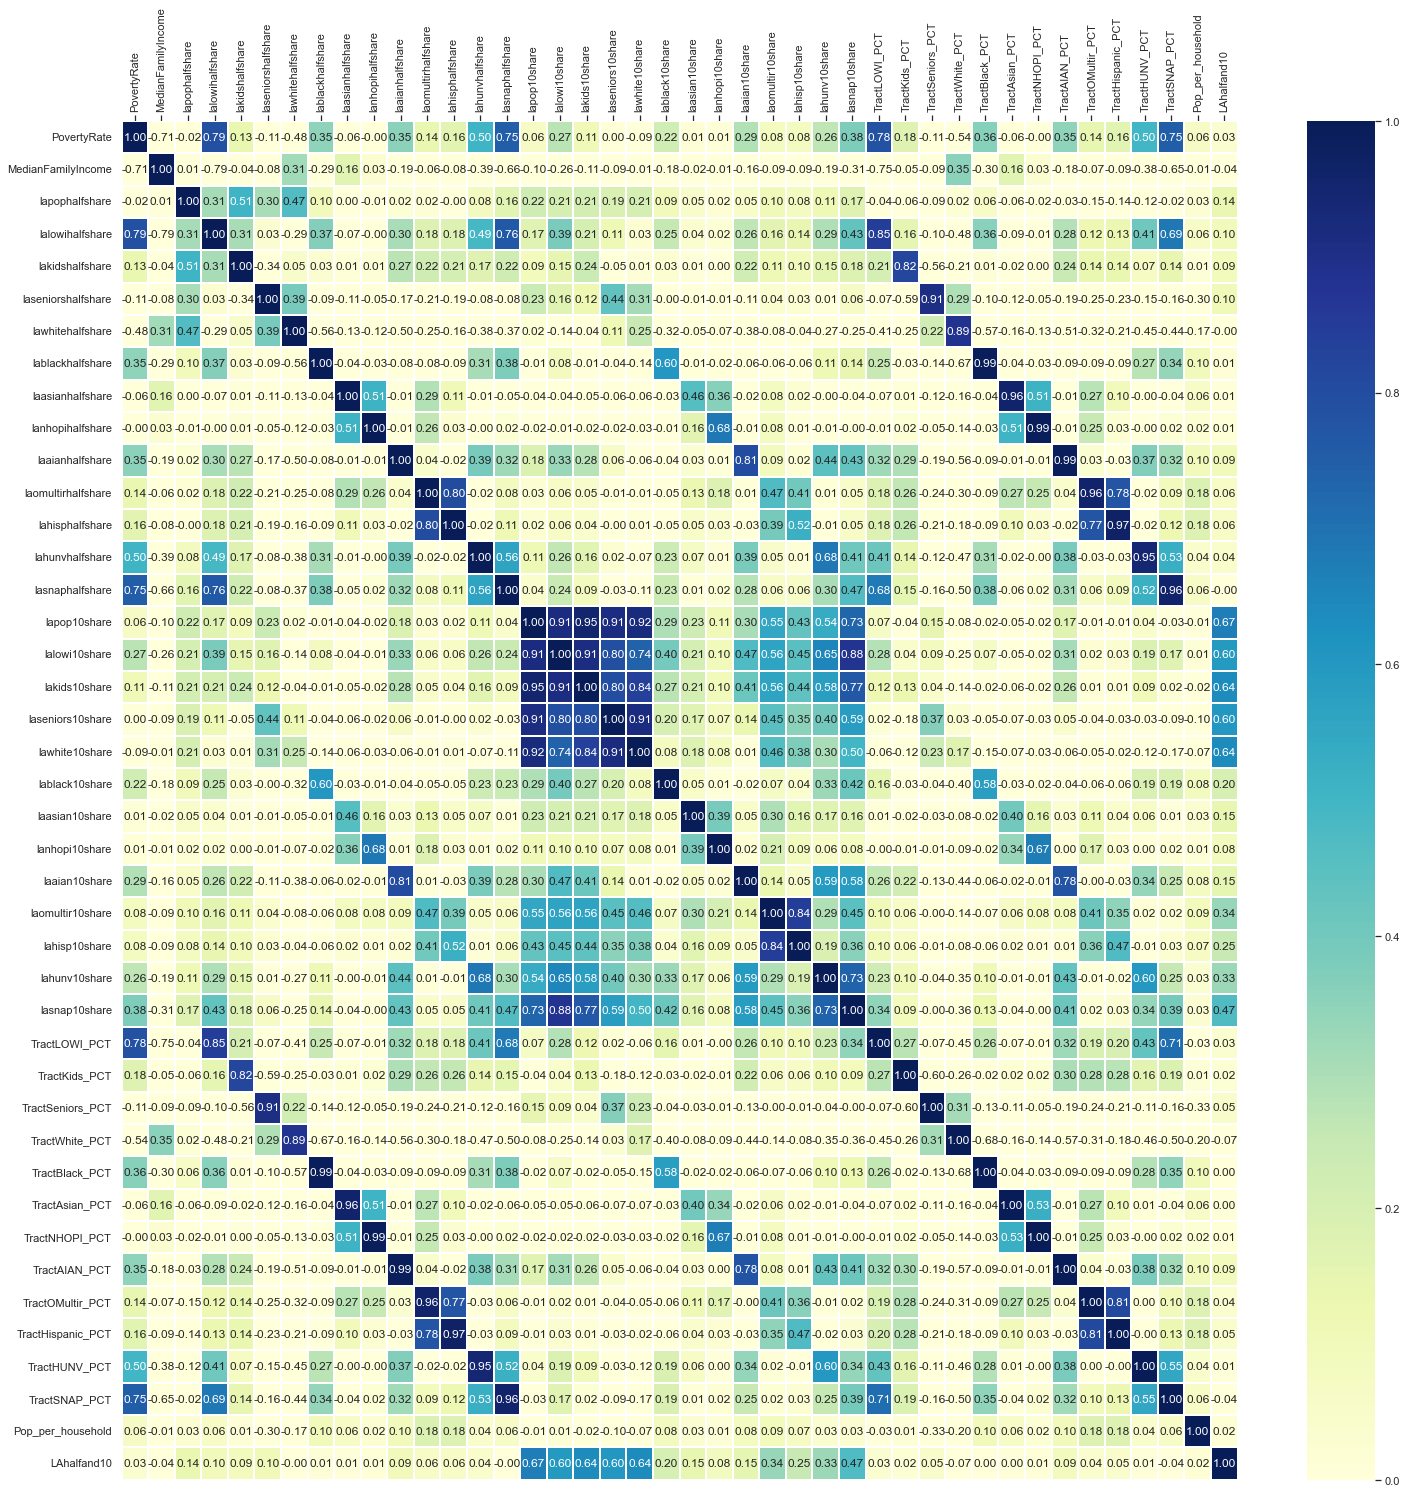

In [27]:
# Check coorelation coefficient of feature in df 
corrM = df2.corr()
  
# Create a heatmap for all parameter correlation values
sns.set(style="white",font_scale=1)
plt.figure(figsize = (25,25))
ax=sns.heatmap(corrM, cmap="YlGnBu", fmt='.2f',annot=True,\
             xticklabels=True,linewidth=2, vmin=0, vmax=1)
# Set x-axis on top and rotate for clarity
ax.xaxis.tick_top()
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [28]:
# Define features and target
X = df2.drop('LAhalfand10', axis=1)
y = df2['LAhalfand10']

# Scale data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Optimization

## Feature Selection

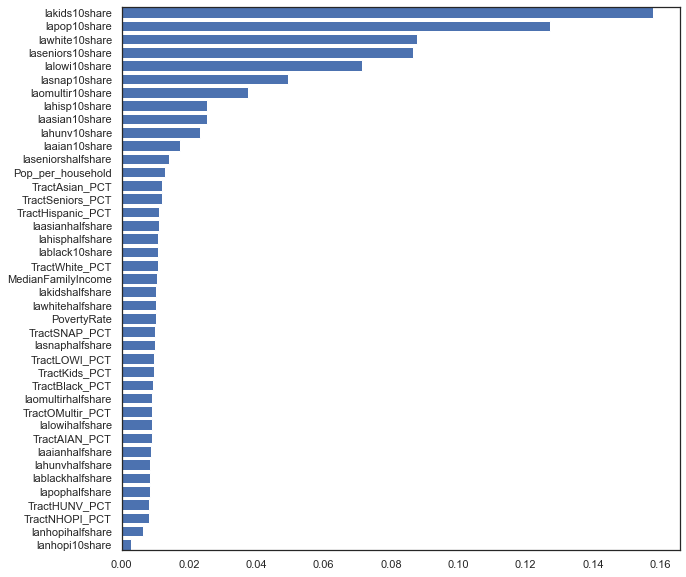

In [29]:
# Create Random Forest Classifier model
clf = RandomForestClassifier().fit(X_train_scaled, y_train)

# visualize the feature importance
feature_importances = clf.feature_importances_
# print(features)

features = sorted(zip(X.columns, clf.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
plt.margins(y=0.001)
ax.barh(y=cols, width=width)

plt.show()

In [30]:
# Select important feature for model
sel = SelectFromModel(clf)
sel.fit(X_train_scaled, y_train)

# Split train/ test data
X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X), y, random_state=1)

# Scale the selected features
scaler = StandardScaler().fit(X_selected_train)
X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)

# Create and fit model with selected features
clf = RandomForestClassifier(random_state=1, n_estimators=100).fit(X_selected_train_scaled, y_train)

# Predict model
y_pred = clf.predict(X_selected_test_scaled)

# Display score
print(classification_report(y_test, y_pred))
print(f'Training Score: {clf.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_selected_test_scaled, y_test)}')

C:\Users\meena\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.87      0.92      0.90      1000
           1       0.91      0.85      0.88       927

    accuracy                           0.89      1927
   macro avg       0.89      0.89      0.89      1927
weighted avg       0.89      0.89      0.89      1927

Training Score: 0.985296661477253
Testing Score: 0.8899844317592112


## Hyperparameter Tuning with GridSearchCV

In [31]:
# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search
param_grid = {
    'max_depth': [1, 3, 5],
    'n_estimators': [50, 100, 200]
}

# Create a base model
clf = RandomForestClassifier()

# Instantiate the grid search model
grid_clf = GridSearchCV(estimator = clf, param_grid = param_grid,
                          cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_clf.fit(X_selected_train_scaled, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 3, 5],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [32]:
# List the best parameters for this dataset
print(grid_clf.best_params_)

# Predict model
y_pred = grid_clf.predict(X_selected_test_scaled)

# Display score
print(classification_report(y_test, y_pred))

print(f'Training Score: {grid_clf.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {grid_clf.score(X_selected_test_scaled, y_test)}')


{'max_depth': 5, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      1000
           1       0.92      0.86      0.89       927

    accuracy                           0.90      1927
   macro avg       0.90      0.90      0.90      1927
weighted avg       0.90      0.90      0.90      1927

Training Score: 0.89586576716831
Testing Score: 0.8962117280747276


# Random Forest Classifier with Third DataFrame (67,286 rows)
* This dataframe was created by adding 13 more features to first dataframe (as part of model optimization) and resulted into an increase of 721,854 datapoints.

## Load Data

In [33]:
# # Third dataframe
# df3 = pd.read_sql_query('select * from food_access_3', engine)
# df3.tail()

In [34]:
# Read df3
df3 = pd.read_csv("third_food_access.csv", index_col=0)
df3.head()

,StateFIPS,CensusTract,State,County,Urban,Pop2010,OHU2010,PovertyRate,MedianFamilyIncome,LAhalfand10,...,TractSeniors_PCT,TractWhite_PCT,TractBlack_PCT,TractAsian_PCT,TractNHOPI_PCT,TractAIAN_PCT,TractOMultir_PCT,TractHispanic_PCT,TractHUNV_PCT,TractSNAP_PCT
0,1,1001020100,Alabama,Autauga County,1,1912,693,11.3,81250.0,1,...,11.56,84.83,11.35,0.73,0.00,0.73,2.35,2.30,0.87,14.72
1,1,1001020200,Alabama,Autauga County,1,2170,743,17.9,49000.0,1,...,9.86,40.92,56.08,0.23,0.00,0.23,2.53,3.46,11.98,21.00
2,1,1001020300,Alabama,Autauga County,1,3373,1256,15.0,62609.0,1,...,13.02,76.37,19.18,0.50,0.15,0.33,3.47,2.58,7.88,13.69
3,1,1001020400,Alabama,Autauga County,1,4386,1722,2.8,70607.0,1,...,20.61,93.16,4.40,0.41,0.09,0.25,1.69,1.94,1.22,5.69
4,1,1001020500,Alabama,Autauga County,1,10766,4082,15.2,96334.0,1,...,10.46,80.49,13.35,2.75,0.08,0.45,2.88,3.30,5.63,8.30


## Preprocess Data

In [35]:
# Calculate population / # of households in order to create a new column
df3['Pop_per_household'] = df3['Pop2010']/df3['OHU2010']
df3.head()

,StateFIPS,CensusTract,State,County,Urban,Pop2010,OHU2010,PovertyRate,MedianFamilyIncome,LAhalfand10,...,TractWhite_PCT,TractBlack_PCT,TractAsian_PCT,TractNHOPI_PCT,TractAIAN_PCT,TractOMultir_PCT,TractHispanic_PCT,TractHUNV_PCT,TractSNAP_PCT,Pop_per_household
0,1,1001020100,Alabama,Autauga County,1,1912,693,11.3,81250.0,1,...,84.83,11.35,0.73,0.00,0.73,2.35,2.30,0.87,14.72,2.759019
1,1,1001020200,Alabama,Autauga County,1,2170,743,17.9,49000.0,1,...,40.92,56.08,0.23,0.00,0.23,2.53,3.46,11.98,21.00,2.920592
2,1,1001020300,Alabama,Autauga County,1,3373,1256,15.0,62609.0,1,...,76.37,19.18,0.50,0.15,0.33,3.47,2.58,7.88,13.69,2.685510
3,1,1001020400,Alabama,Autauga County,1,4386,1722,2.8,70607.0,1,...,93.16,4.40,0.41,0.09,0.25,1.69,1.94,1.22,5.69,2.547038
4,1,1001020500,Alabama,Autauga County,1,10766,4082,15.2,96334.0,1,...,80.49,13.35,2.75,0.08,0.45,2.88,3.30,5.63,8.30,2.637433


In [36]:
# List of columns to refer to during pre-processing and training
list(df3.columns)

['StateFIPS',
 'CensusTract',
 'State',
 'County',
 'Urban',
 'Pop2010',
 'OHU2010',
 'PovertyRate',
 'MedianFamilyIncome',
 'LAhalfand10',
 'lapophalfshare',
 'lalowihalfshare',
 'lakidshalfshare',
 'laseniorshalfshare',
 'lawhitehalfshare',
 'lablackhalfshare',
 'laasianhalfshare',
 'lanhopihalfshare',
 'laaianhalfshare',
 'laomultirhalfshare',
 'lahisphalfshare',
 'lahunvhalfshare',
 'lasnaphalfshare',
 'TractLOWI',
 'TractKids',
 'TractSeniors',
 'TractWhite',
 'TractBlack',
 'TractAsian',
 'TractNHOPI',
 'TractAIAN',
 'TractOMultir',
 'TractHispanic',
 'TractHUNV',
 'TractSNAP',
 'TractLOWI_PCT',
 'TractKids_PCT',
 'TractSeniors_PCT',
 'TractWhite_PCT',
 'TractBlack_PCT',
 'TractAsian_PCT',
 'TractNHOPI_PCT',
 'TractAIAN_PCT',
 'TractOMultir_PCT',
 'TractHispanic_PCT',
 'TractHUNV_PCT',
 'TractSNAP_PCT',
 'Pop_per_household']

In [37]:
# Drop columns that don't contribute to the model
df3= df3.drop(columns = ['Pop2010', 'OHU2010', 'StateFIPS', 'CensusTract', 'State', 'County', 'Urban',
              'TractLOWI', 'TractKids', 'TractSeniors', 'TractWhite', 'TractBlack', 'TractAsian', 
              'TractNHOPI', 'TractAIAN', 'TractOMultir', 'TractHispanic', 'TractHUNV', 'TractSNAP'])
df3.head()

,PovertyRate,MedianFamilyIncome,LAhalfand10,lapophalfshare,lalowihalfshare,lakidshalfshare,laseniorshalfshare,lawhitehalfshare,lablackhalfshare,laasianhalfshare,...,TractWhite_PCT,TractBlack_PCT,TractAsian_PCT,TractNHOPI_PCT,TractAIAN_PCT,TractOMultir_PCT,TractHispanic_PCT,TractHUNV_PCT,TractSNAP_PCT,Pop_per_household
0,11.3,81250.0,1,100.00,24.42,26.52,11.56,84.83,11.35,0.73,...,84.83,11.35,0.73,0.00,0.73,2.35,2.30,0.87,14.72,2.759019
1,17.9,49000.0,1,100.00,44.34,27.93,9.86,40.92,56.08,0.23,...,40.92,56.08,0.23,0.00,0.23,2.53,3.46,11.98,21.00,2.920592
2,15.0,62609.0,1,84.70,28.79,22.86,10.60,64.53,16.43,0.30,...,76.37,19.18,0.50,0.15,0.33,3.47,2.58,7.88,13.69,2.685510
3,2.8,70607.0,1,83.24,20.36,19.30,17.48,77.41,3.88,0.34,...,93.16,4.40,0.41,0.09,0.25,1.69,1.94,1.22,5.69,2.547038
4,15.2,96334.0,1,72.25,15.97,21.45,7.80,58.51,9.29,1.94,...,80.49,13.35,2.75,0.08,0.45,2.88,3.30,5.63,8.30,2.637433


In [38]:
# Move the target column to the last
cols = list(df3.columns.values)
cols.pop(cols.index('LAhalfand10')) 
df3 = df3[cols+['LAhalfand10']]
df3.head()

,PovertyRate,MedianFamilyIncome,lapophalfshare,lalowihalfshare,lakidshalfshare,laseniorshalfshare,lawhitehalfshare,lablackhalfshare,laasianhalfshare,lanhopihalfshare,...,TractBlack_PCT,TractAsian_PCT,TractNHOPI_PCT,TractAIAN_PCT,TractOMultir_PCT,TractHispanic_PCT,TractHUNV_PCT,TractSNAP_PCT,Pop_per_household,LAhalfand10
0,11.3,81250.0,100.00,24.42,26.52,11.56,84.83,11.35,0.73,0.00,...,11.35,0.73,0.00,0.73,2.35,2.30,0.87,14.72,2.759019,1
1,17.9,49000.0,100.00,44.34,27.93,9.86,40.92,56.08,0.23,0.00,...,56.08,0.23,0.00,0.23,2.53,3.46,11.98,21.00,2.920592,1
2,15.0,62609.0,84.70,28.79,22.86,10.60,64.53,16.43,0.30,0.03,...,19.18,0.50,0.15,0.33,3.47,2.58,7.88,13.69,2.685510,1
3,2.8,70607.0,83.24,20.36,19.30,17.48,77.41,3.88,0.34,0.06,...,4.40,0.41,0.09,0.25,1.69,1.94,1.22,5.69,2.547038,1
4,15.2,96334.0,72.25,15.97,21.45,7.80,58.51,9.29,1.94,0.05,...,13.35,2.75,0.08,0.45,2.88,3.30,5.63,8.30,2.637433,1


In [39]:
# Check for null values
df3.isnull().sum()

PovertyRate           0
MedianFamilyIncome    0
lapophalfshare        0
lalowihalfshare       0
lakidshalfshare       0
laseniorshalfshare    0
lawhitehalfshare      0
lablackhalfshare      0
laasianhalfshare      0
lanhopihalfshare      0
laaianhalfshare       0
laomultirhalfshare    0
lahisphalfshare       0
lahunvhalfshare       0
lasnaphalfshare       0
TractLOWI_PCT         0
TractKids_PCT         0
TractSeniors_PCT      0
TractWhite_PCT        0
TractBlack_PCT        0
TractAsian_PCT        0
TractNHOPI_PCT        0
TractAIAN_PCT         0
TractOMultir_PCT      0
TractHispanic_PCT     0
TractHUNV_PCT         0
TractSNAP_PCT         0
Pop_per_household     0
LAhalfand10           0
dtype: int64

In [40]:
# Check for duplicate values 
df3.duplicated().sum()

0

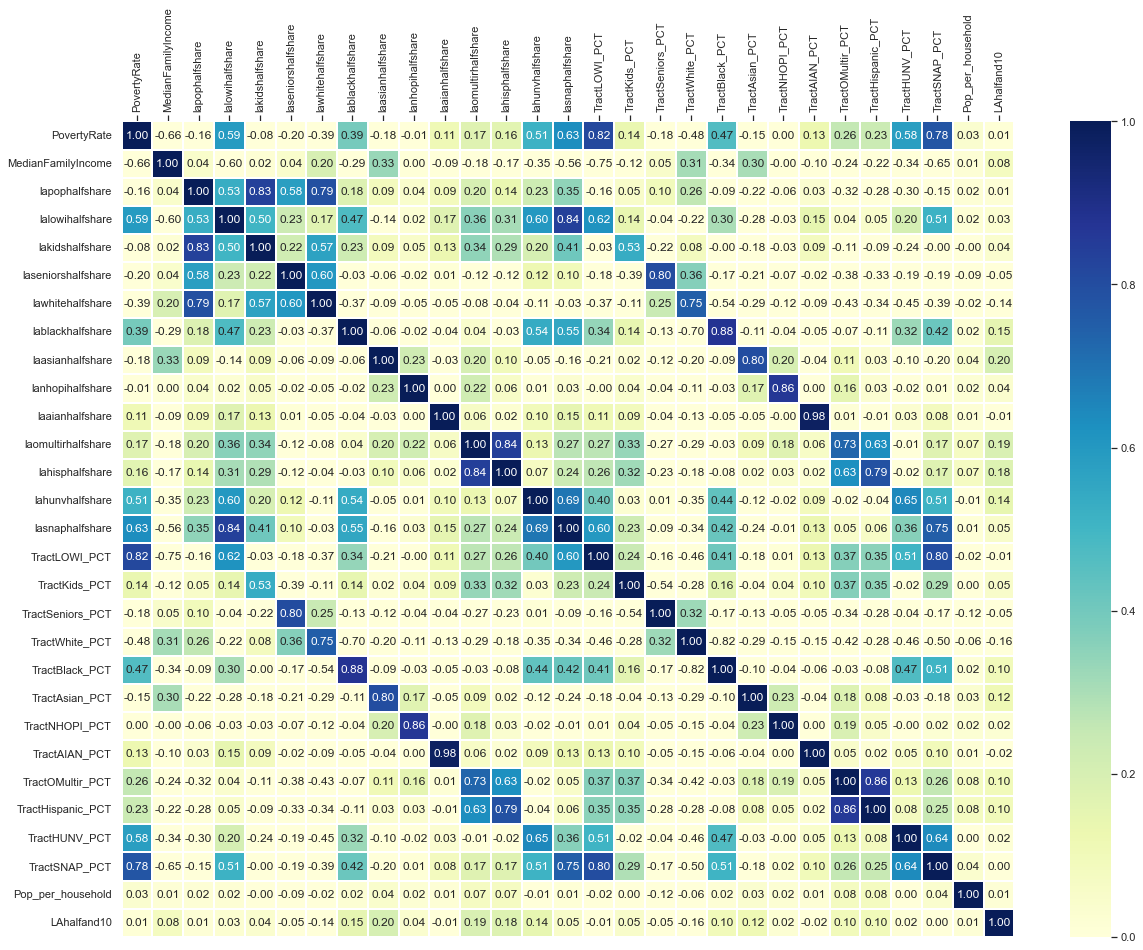

In [41]:
# Check coorelation coefficient of feature in df 
corrM = df3.corr()
  
# Create a heatmap for all parameter correlation values
sns.set(style="white",font_scale=1)
plt.figure(figsize = (20,15))
ax=sns.heatmap(corrM, cmap="YlGnBu", fmt='.2f',annot=True,\
             xticklabels=True,linewidth=2, vmin=0, vmax=1)
# Set x-axis on top and rotate for clarity
ax.xaxis.tick_top()
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [42]:
# Define features and target
X = df3.drop('LAhalfand10', axis=1)
y = df3['LAhalfand10']

# Scale data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Testing Various Binary Classification Models: Model, Fit, Predict

In [43]:
# Create models
models = [
    LogisticRegression(),
    Lasso(),
    Ridge(),
    ElasticNet(),
    KNeighborsClassifier(),
    GaussianNB(),
    SVC(),
    DecisionTreeClassifier(),
    AdaBoostClassifier(),
    RandomForestClassifier()
    
]


In [44]:
# Fit and Pedict models
for model in models:
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)       
    print(model)
    print(f'Training Score: {model.score(X_train_scaled, y_train)}')
    print(f'Testing Score: {model.score(X_test_scaled, y_test)}')
    print()   
      

LogisticRegression()
Training Score: 0.7918318008877616
Testing Score: 0.7907502080608727

Lasso()
Training Score: 0.0
Testing Score: -0.00011396489086012984

Ridge()
Training Score: 0.16529671383460065
Testing Score: 0.15977550326061607

ElasticNet()
Training Score: 0.0
Testing Score: -0.00011396489086012984

KNeighborsClassifier()
Training Score: 0.8650324984147115
Testing Score: 0.8085839971465938

GaussianNB()
Training Score: 0.545933734939759
Testing Score: 0.5493401498038283

SVC()
Training Score: 0.8344562460367787
Testing Score: 0.833372963975746

DecisionTreeClassifier()
Training Score: 1.0
Testing Score: 0.7841517060991559

AdaBoostClassifier()
Training Score: 0.8276593214965123
Testing Score: 0.8260016644869813

RandomForestClassifier()
Training Score: 0.9999801838934687
Testing Score: 0.8453810486267982



# Model Optimization

## Feature Selection

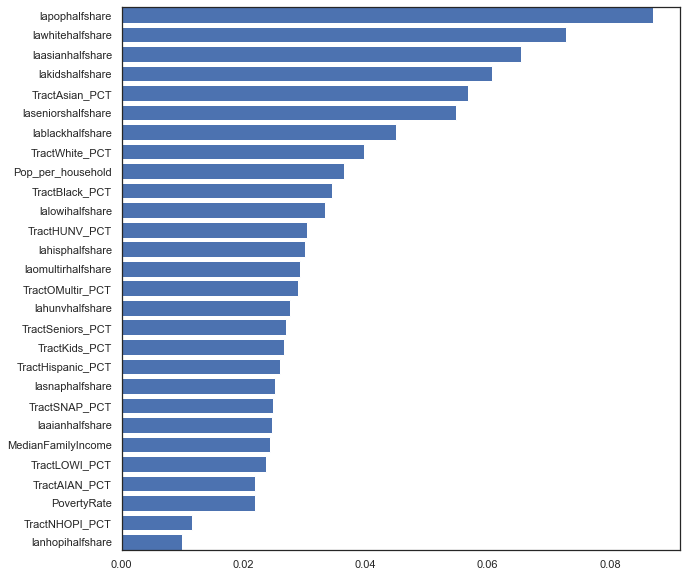

In [45]:
# Create Random Forest Classifier model
clf = RandomForestClassifier().fit(X_train_scaled, y_train)

# visualize the feature importance
feature_importances = clf.feature_importances_
# print(features)

features = sorted(zip(X.columns, clf.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
plt.margins(y=0.001)
ax.barh(y=cols, width=width)

plt.show()

In [46]:
# Select important feature for model
sel = SelectFromModel(clf)
sel.fit(X_train_scaled, y_train)

# Split train/ test data
X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X), y, random_state=1)

# Scale the selected features
scaler = StandardScaler().fit(X_selected_train)
X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)

# Create and fit model with selected features
clf = RandomForestClassifier(random_state=1, n_estimators=100).fit(X_selected_train_scaled, y_train)

# Predict model
y_pred = clf.predict(X_selected_test_scaled)

# Display score
print(classification_report(y_test, y_pred))
print(f'Training Score: {clf.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_selected_test_scaled, y_test)}')

C:\Users\meena\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.74      0.63      0.68      4615
           1       0.87      0.92      0.89     12207

    accuracy                           0.84     16822
   macro avg       0.81      0.77      0.79     16822
weighted avg       0.83      0.84      0.83     16822

Training Score: 0.9999801838934687
Testing Score: 0.838366424919748


## Hyperparameter Tuning with GridSearchCV

In [47]:
# Create the parameter grid based on the results of random search
param_grid = {
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200]
}

# Create a base model
clf = RandomForestClassifier()

# Instantiate the grid search model
grid_clf = GridSearchCV(estimator = clf, param_grid = param_grid,
                          cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_clf.fit(X_selected_train_scaled, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [48]:
# List the best parameters for this dataset
print(grid_clf.best_params_)

# Predict model
y_pred = grid_clf.predict(X_selected_test_scaled)

# Display score
print(classification_report(y_test, y_pred))

print(f'Training Score: {grid_clf.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {grid_clf.score(X_selected_test_scaled, y_test)}')

{'max_depth': 7, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.74      0.55      0.63      4615
           1       0.84      0.93      0.88     12207

    accuracy                           0.82     16822
   macro avg       0.79      0.74      0.76     16822
weighted avg       0.82      0.82      0.81     16822

Training Score: 0.8340202916930881
Testing Score: 0.8229699203424088


# Ananlysis

We created multiple dataframes (different feature numbers/ rows) from our dataset and used various binary classification models to get the best performing model. Following are the conclusions from our best model (using third dataframe):
* Out of all the binary classification models tested, Random Forest Classifier gave the highest accuracy with overfitting (Training Score: 1.0, Testing Score: 0.84). 
* Feature addition improved model accuracy - third dataframe was created by adding 13 more features to first dataframe and it increased the accuracy from 0.76 to 0.82.
* Feature selection was not helpful in resolving overfitting issue (Training Score: 0.99, Testing Score: 0.83).
* Hyperparameter tuning ('max_depth': 7, 'n_estimators': 200) resolved the overfitting issue (Training Score: 0.83, Testing Score: 0.82) with some decrease in accuracy (0.84 to 0.82)
* Optimized model has a high recall (0.93) for "label 1" (low access population with food insecurity flag) which means our model is highly efficient in predicting true positives for this class (less false negatives). Correct prediction of this flag is important for people to qualify for food assistance benefits. 

* Limitations of first and second dataframes:
    * First dataframe - Even though the number of rows is high (71,782 rows), the accuracy score is pretty low (0.75).
    * Second dataframe - Even though the accuracy is high (.90), the number of rows is suboptimal (7,708 rows) for machine learning.
